In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from collections import Counter
from wordcloud import STOPWORDS

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


## Target Distribution in Keywords

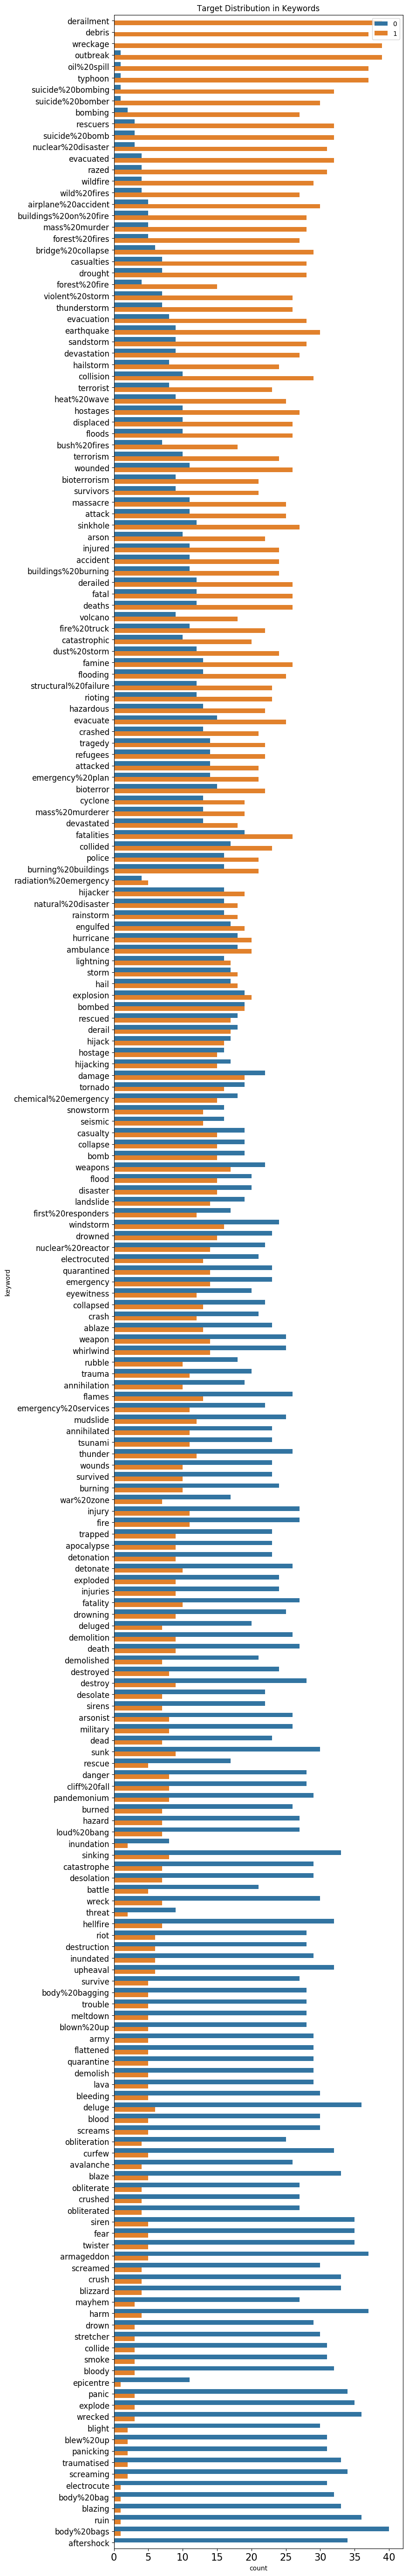

In [6]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

## Feature engineering

In [13]:
# word count
df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(x.split()))

# word frequency
df_train['word_frequency'] = df_train['text'].apply(lambda x: Counter(x.lower().split()))
df_test['word_frequency'] = df_train['text'].apply(lambda x: Counter(x.lower().split()))

# unique words
df_train['unique_words'] = df_train['text'].apply(lambda x: len(set(x.lower().split())))
df_test['unique_words'] = df_train['text'].apply(lambda x: len(set(x.lower().split())))

# stop words
df_train['stop_words'] = df_train['text'].apply(lambda x: len([i for i in set(x.lower().split()) if i in STOPWORDS]))
df_test['stop_words'] = df_train['text'].apply(lambda x: len([i for i in set(x.lower().split()) if i in STOPWORDS]))

# url count
df_train['url_count'] = df_train['text'].apply(lambda x: len([i for i in set(x.lower().split()) if 'http' in i]))
df_test['url_count'] = df_train['text'].apply(lambda x: len([i for i in set(x.lower().split()) if 'http' in i]))

# mean word length
df_train['avg_word_length'] = df_train['text'].apply(lambda x: sum(len(w) for w in x.lower().split())/len(x))
df_test['avg_word_length'] = df_train['text'].apply(lambda x: sum(len(w) for w in x.lower().split())/len(x))

In [14]:
df_train.head()

,id,keyword,location,text,target,word_count,word_frequency,unique_words,stop_words,url_count,avg_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,"{'our': 1, 'deeds': 1, 'are': 1, 'the': 1, 're...",13,6,0,0.826087
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,"{'forest': 1, 'fire': 1, 'near': 1, 'la': 1, '...",7,0,0,0.842105
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,"{'all': 1, 'residents': 1, 'asked': 1, 'to': 1...",20,9,0,0.842105
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,"{'13,000': 1, 'people': 1, 'receive': 1, '#wil...",8,1,0,0.876923
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,"{'just': 1, 'got': 1, 'sent': 1, 'this': 1, 'p...",15,6,0,0.818182
